# Pandas 概述

[Pandas](http://pandas.pydata.org/)是一个基于 Numpy 的 Python 数据分析库。Pandas 提供了高效易用的数据结构与数据分析工具，应用领域广泛，包括金融，经济，统计，科学等学术和商业领域。或许正是 Pandas 的出现，才使得 Python 才成为一个强大而高效的数据分析环境。

Pandas 的功能非常强大，主要特点如下：
- 快速高效的 DataFrame 对象，非常适合于 SQL 数据库或 Excel 中的表格类数据。
- 能够处理有序和无序（不一定是等间隔）的时间序列数据。
- 支持带有行和列标签的任意的矩阵数据（同构或异构数据类型）。
- 快捷地把其它形式的观测或统计数据导入到Pandas数据结构中。
- 灵活处理缺失数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 为什么使用Pandas？

Python 内置数据结构类型以及 Numpy 的数组可用于组织管理数据集，其特点如下：

| 结构      | 同质 | 可变 | 重复 |  有序  | 映射 |
|------------:|-----:|-----:|-----:|-----:|-----:|
|列表（list） | 否   |  是 | 是   | 是 |  否  |
|元组（tuple）| 否   |  否 | 是   | 是 |  否  |
|集合（set）  | 否   |  是 | 否   | 否 |  否  |
|字典（dict） | 否   |  是 | 是   | 否 |  是  |
|数组（ndarray）| 是   | 是 | 是   | 是 |  否  |

在现实世界中观测或记录的数据，通常都是在某种时空条件下测量的。例如要分析饭店不同时段用餐人数，如果使用 Numpy 的话，需要创建两个数组：

In [2]:
# 时间4点，5点，... 22点
times = np.array([6, 7, 8, 11, 12, 13, 18, 19, 20, 21])
# 顾客人数
customers = np.array([60, 70, 65, 100, 230, 150, 100, 300, 250, 150])
customers

array([ 60,  70,  65, 100, 230, 150, 100, 300, 250, 150])

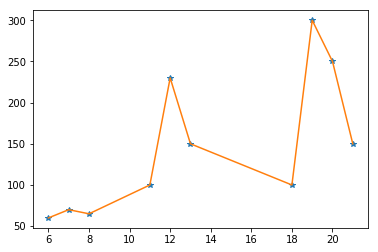

In [3]:
# 绘制不同时段顾客人数的变化
plt.plot(times, customers, '*')
plt.plot(times, customers)

使用两个数组或多个数组来维护同一个数据时，如果要进行修改、添加删除等操作就得同时对两个数组进行操作；而且很容易出现数据未对齐的现象。如果很多类似采集的数据，采集时间有所不同，那么就会出现不同数据源（索引不同）导致的数据处理问题。

Pandas 提供新的数据结构以及数据分析工具，可以轻松实现上述需求。实际上，这仅仅是 Pandas 功能的一小部分。

## 自省

Pandas 是一个软件包，使用之前需要使用`import`导入。通常使用如下便捷方式导入：

In [4]:
import pandas as pd

可以使用内置函数来查看`pandas`内容：

In [59]:
print(dir(pd))

['Categorical', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'ExcelFile', 'ExcelWriter', 'Expr', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int64Index', 'Interval', 'IntervalIndex', 'MultiIndex', 'NaT', 'Panel', 'Period', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseArray', 'SparseDataFrame', 'SparseSeries', 'Term', 'TimeGrouper', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt64Index', 'WidePanel', '_DeprecatedModule', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_hashtable', '_lib', '_libs', '_np_version_under1p10', '_np_version_under1p11', '_np_version_under1p12', '_np_version_under1p13', '_np_version_under1p14', '_np_version_under1p15', '_tslib', '_version', 'api', 'bdate_range', 'compat', 'concat', 'core', 'crosstab', 'cut', 'date_range', 'datetime', 'datetools', 'describe_option', 'errors', 'eval', 'factorize', 'get_dummies', 'get_opt

与 Numpy 一样，Pandas 提供有几个核心数据结构，以及大量的实用函数。学习 Pandas 的方法，首先要掌握几个核心的数据类型：
- `Series`；
- `DataFrame`；

然后按照数据分析的过程，逐步掌握如何使用 Pandas 来导入数据、探索数据、选取数据、清洗数据、处理数据、统计数据、导出数据等使用函数。

## `Series`类型

Pandas 中的 `Series` 类型类似于 Numpy 的一位数组，但与之不同的是，它还有一个与之相关的数据标签，即索引。可以通过索引来找出其值，与映射有些类似。故`Series`对象用于组织管理同质、可变、可重复、有序，有映射的数据集。如下表所示：

| 结构      | 同质 | 可变 | 重复 |  有序  | 映射 |
|------------:|-----:|-----:|-----:|-----:|-----:|
|列表（list） | 否   |  是 | 是   | 是 |  否  |
|数组（`ndarray`）| 是   | 是 | 是   | 是 |  否  |
|序列（`Series`）| 是   | 是 | 是   | 是 |  是  |

### 对象自省

可以调用`pd.Series`来创建一个`Series`对象，其语法为：
```
pandas.Series(data, index, dtype, copy)
```
其中参数说明为：
- `data`，数据，支持类数组、字典、标量对象；
- `index`，索引，支持类数组、一维索引对象；
- `dtype`，数据类型；
- `copy`，布尔值，缺省是False，是否拷贝数据；

使用前面提过的不同时段顾客人数来创建一个 `Series` 对象：

In [6]:
customers = pd.Series([60, 70, 65, 100, 230, 150, 100, 300, 250, 150])
customers

0     60
1     70
2     65
3    100
4    230
5    150
6    100
7    300
8    250
9    150
dtype: int64

使用自省方法来查看变量`customers`所属类型：

In [7]:
type(customers)

pandas.core.series.Series

从上面结果可知，`Series`数据结构除了一维数组外，还有对应的索引（或标识）。索引在左，数据在右。在创建`Series`对象时不指定索引会自动创建一个整数型索引。可以通过`values`和`index`属性得到数据值和索引：

In [8]:
# 数据属性
print(type(customers.values), customers.values)
# 索引属性
print(type(customers.index), customers.index)

<class 'numpy.ndarray'> [ 60  70  65 100 230 150 100 300 250 150]
<class 'pandas.core.indexes.range.RangeIndex'> RangeIndex(start=0, stop=10, step=1)


从上述结果可知，`Series`对象的属性 `values` 就是一个一维数组，属性`index`是不同的索引对象。

`Series`的数据是一维数组，其数据类型都是一样，可以通过属性`dtype`来查看：

In [9]:
customers.dtypes

dtype('int64')

在调用 `pd.Series` 创建一个 `Series` 对象时，可以指定一个列表或数组来创建索引。使用前面提过的顾客数以及采样时间创建一个`Series`对象：

In [10]:
customers = pd.Series([60, 70, 65, 100, 230, 150, 100, 300, 250, 150], 
                      index=[6, 7, 8, 11, 12, 13, 18, 19, 20, 21])
customers

6      60
7      70
8      65
11    100
12    230
13    150
18    100
19    300
20    250
21    150
dtype: int64

可以看出新创建的`Series`对象的索引已经更改为采样时间，是一种整数索引：

In [11]:
print(type(customers.index))

<class 'pandas.core.indexes.numeric.Int64Index'>


`Series`对象与数组最主要的区别就是多了一个索引。在 Pandas 中有很多不同的索引对象。例如在刚才示例中，还可以使用字符串，或日期对象来创建`Series`对象：

In [12]:
times = ['6h', '7h', '8h', '11h', '12h', '13h', '18h', '19h', '20h', '21h']
customers = pd.Series([60, 70, 65, 100, 230, 150, 100, 300, 250, 150], index=times)
customers

6h      60
7h      70
8h      65
11h    100
12h    230
13h    150
18h    100
19h    300
20h    250
21h    150
dtype: int64

In [13]:
type(customers.index)

pandas.core.indexes.base.Index

In [14]:
from datetime import datetime
times = [datetime(2018, 10, 10, 6), datetime(2018, 10, 10, 7), 
         datetime(2018, 10, 10, 8), datetime(2018, 10, 10, 11), 
         datetime(2018, 10, 10, 12), datetime(2018, 10, 10, 13), 
         datetime(2018, 10, 10, 18), datetime(2018, 10, 10, 19), 
         datetime(2018, 10, 10, 20), datetime(2018, 10, 10, 21)]
customers = pd.Series([60, 70, 65, 100, 230, 150, 100, 300, 250, 150], index=times)
customers

2018-10-10 06:00:00     60
2018-10-10 07:00:00     70
2018-10-10 08:00:00     65
2018-10-10 11:00:00    100
2018-10-10 12:00:00    230
2018-10-10 13:00:00    150
2018-10-10 18:00:00    100
2018-10-10 19:00:00    300
2018-10-10 20:00:00    250
2018-10-10 21:00:00    150
dtype: int64

In [15]:
type(customers.index)

pandas.core.indexes.datetimes.DatetimeIndex

### 创建对象

可以从多种方式来创建`Series`对象，例如列表、字典、数组等。需要注意的是`Series`对象需要一个索引，也就是每个数据都对应与一个索引值。

#### 创建空的`Series`对象

不指定数据及索引，会创建一个空的`Series`：

In [16]:
empty = pd.Series()
empty

Series([], dtype: float64)

#### 从标量来创建`Series`对象

如果传入的数据参数是一个标量值，并且同时提供索引的话，可以广播该值来匹配索引：

In [51]:
pd.Series('休息', index=times)

6     休息
7     休息
8     休息
11    休息
12    休息
13    休息
18    休息
19    休息
20    休息
21    休息
dtype: object

#### 使用列表对象创建`Series`

使用列表对象创建`Series`，还可以使用`dtype`来指定数据类型：

In [52]:
pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'], dtype='int8')

a    0
b    0
c    0
d    1
dtype: int8

#### 使用数组构建Series

可以使用数组对象来构建`Series`对象：

In [50]:
# data与索引长度须一致
pd.Series(np.random.randn(4), index=['aa','bb','c','d']) 

aa   -0.421059
bb    0.500592
c     0.813208
d     0.127528
dtype: float64

#### 用字典来创建`Series`对象

`Series`对象有一个索引以及数组，索引值与数据值存在一个映射关系。Python中的字典是一个类似键值对数据结构，使用`pd.Series`并传入一个字典对象，也可以创建一个`Series`对象，其索引就是字典中的键（有序排列）

In [49]:
# 饭店-顾客的字典
hotel2customer = {'Xuhui': 200, 'Pudong': 180, 'Jingan': 210, 'Sheshan': 100}
customers = pd.Series(hotel2customer)
customers

Xuhui      200
Pudong     180
Jingan     210
Sheshan    100
dtype: int64

## `DataFrame`数据类型

`DataFrame`是一个表格型的数据结构，中文可称为数据帧。把`DataFrame`理解为`Series`在横向上的扩展，包含一组有序的列，每个列都使用同一个索引，即`DataFrame`对象除了行索引外，还有列索引。

可以把 `DataFrame` 对象理解为组织管理异质、可变、可重复、有序，有映射的数据集。如下表所示：

| 结构      | 同质 | 可变 | 重复 |  有序  | 映射 |
|------------:|-----:|-----:|-----:|-----:|-----:|
|列表（list） | 否   |  是 | 是   | 是 |  否  |
|数组（`ndarray`）| 是   | 是 | 是   | 是 |  否  |
|序列（`Series`）| 是   | 是 | 是   | 是 |  是  |
|数据帧（`DataFrame`）| 否  | 是 | 是   | 是 |  是  |

在实际工作中，表格型数据比比皆是，例如Excel表格，数据库的表。下图是一个简单数据库的示意：
![数据库表格](../images/database_tables.png)

### 对象自省

可以调用`pd.DataFrame()`来创建一个`DataFrame`对象。其语法为：
```
pandas.DataFrame(data, index, columns, dtype, copy)
```
其中参数说明为：
- `data`，数据支持多种形式，包括数组、Series、列表、字典、标量或`DataFrame`对象；
- `index`，行索引，与`Series`的索引类似；
- `columns`，列索引；
- `dtype`，每列的数据类型；
- `copy`，布尔值，默认是False，是否拷贝数据；

同样仍然用饭店在不同时段顾客人数的例子，不过这里又增加了平均消费的内容：

In [25]:
# 时段4点，5点，... 22点
times = np.array([6, 7, 8, 11, 12, 13, 18, 19, 20, 21])
# 顾客人数
customers = np.array([60, 70, 65, 100, 230, 150, 100, 300, 250, 150])
# 平均消费
costs = np.array([6, 7, 8, 24, 23, 26, 45, 55, 45, 40])

通过传入等长的列表或数组组成的字典来创建`DataFrame`对象：

In [26]:
data = {'customers': customers, 'costs': costs}
df = pd.DataFrame(data, index=times)
df

,customers,costs
6,60,6
7,70,7
8,65,8
11,100,24
12,230,23
13,150,26
18,100,45
19,300,55
20,250,45
21,150,40


使用内置函数来查看创建的对象属于哪种数据类型：

In [27]:
type(df)

pandas.core.frame.DataFrame

与`Series`一样，使用`index`参数来指定行索引，如果不指定会自动生成一个整数索引对象。不同之处在于，`DataFrame`对象多了列索引。使用`values`、`index`与`columns`属性来访问`DataFrame`对象的数据值、行索引与列索引：

In [28]:
# 数据
print(type(df.values))
df.values

<class 'numpy.ndarray'>


array([[ 60,   6],
       [ 70,   7],
       [ 65,   8],
       [100,  24],
       [230,  23],
       [150,  26],
       [100,  45],
       [300,  55],
       [250,  45],
       [150,  40]])

In [29]:
# 行索引
print(type(df.index))
df.index

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([6, 7, 8, 11, 12, 13, 18, 19, 20, 21], dtype='int64')

In [30]:
# 列索引
print(type(df.columns))
df.columns

<class 'pandas.core.indexes.base.Index'>


Index(['customers', 'costs'], dtype='object')

`DataFrame`对象包括多个列，不同列的数据类型可以不同，但每个列的数据类型则是一样，可以通过属性`dtypes`来查看：

In [31]:
df.dtypes

customers    int32
costs        int32
dtype: object

刚才使用字典来创建`DataFrame`对象时，字典的键自动转换为列索引，并且进行了自动排序。可以使用关键字参数`columns`来指定列索引：

In [32]:
data = {'customers': customers, 'costs': costs}
df = pd.DataFrame(data, index=times, columns=['customers', 'costs'])
df

,customers,costs
6,60,6
7,70,7
8,65,8
11,100,24
12,230,23
13,150,26
18,100,45
19,300,55
20,250,45
21,150,40


### 创建对象

可以从多种方式来创建`DataFrame`对象，例如字典、、嵌套列表、二维数组等。需要注意的是，`DataFrame`对象需要行索引与列索引。

#### 创建空`DataFrame`对象

调用`pd.DataFrame()`时，不指定参数就会创建一个空`DataFrame`对象：

In [33]:
empty = pd.DataFrame()
print(empty)

Empty DataFrame
Columns: []
Index: []


#### 使用列表创建`DataFrame`

可以使用嵌套列表来创建`DataFrame`对象：

In [54]:
data = [
    ['skol', 'Kovalevskaya', 'Sofia'],
    ['mlom', 'Lomonosov', 'Mikhail'],
    ['dmitri', 'Mendeleev', 'Dmitri'],
    ['ivan', 'Pavlov', 'Ivan'],
]
pd.DataFrame(data, columns=['Login', 'LastName', 'FirstName'])

,Login,LastName,FirstName
0,skol,Kovalevskaya,Sofia
1,mlom,Lomonosov,Mikhail
2,dmitri,Mendeleev,Dmitri
3,ivan,Pavlov,Ivan


#### 通过数组构建`DataFrame`

通过数组构建`DataFrame`，可以指定行索引和列名，如果不指定为自动创建：

In [57]:
pd.DataFrame(np.random.randn(5,4))

,0,1,2,3
0,0.432148,0.475122,0.076751,0.672929
1,1.365737,1.515791,0.369223,-0.563320
2,-1.573148,0.699788,0.284713,-0.576827
3,0.208627,0.323253,0.163122,0.165000
4,0.157681,-0.841611,-1.513325,0.419078


In [58]:
# 指定行索引和列名
pd.DataFrame(np.random.randn(5,4), index=list('abcde'), columns=list('colu'))

,c,o,l,u
a,-1.007165,-1.522161,0.454102,-0.908417
b,-0.265410,0.246893,1.484161,0.500641
c,0.490937,-0.327820,0.417542,-1.452452
d,1.086857,0.860738,-0.030451,1.336564
e,0.002682,-0.397961,0.351670,0.513668


#### 使用字典来创建`DataFrame`

前面已经介绍过使用字典来创建`DataFrame`对象，这里再举一个稍微复杂的例子。

In [35]:
data = {'A': 3.13, 'B': '字符', 'C': np.arange(5), 'D': pd.Series(np.arange(5)*2)}
pd.DataFrame(data)

,A,B,C,D
0,3.13,字符,0,0
1,3.13,字符,1,2
2,3.13,字符,2,4
3,3.13,字符,3,6
4,3.13,字符,4,8


In [53]:
print(type(data.values))
data.values

<class 'builtin_function_or_method'>


<function dict.values>

## Pandas速查手册

Pandas 功能强大，除了核心数据结构类型`DataFrame`与`Series`外，还提供了大量的使用函数，`DataFrame`与`Series`对象本身还有很多方法。为了方便学习和使用，有人编写了速查手册。下面列出速查手册中的常用函数与方法。

> Pandas的核心数据对象是`DataFrame`与`Series`，这里分别简写为`df`与`s`

### 导入数据

- `pd.read_csv(filename)`：读取CSV文件
- `pd.read_table(filename)`：读取分隔符文本文件
- `pd.read_excel(filename)`：读取Excel文件
- `pd.read_sql(query, connection_object)`：读取SQL表/库
- `pd.read_json(json_string)`：读取JSON字符串
- `pd.read_html(url)`：解析URL或者HTML文件，抽取表格数据
- `pd.DataFrame(dict)`：从字典对象创建`DataFrame`

### 导出数据

- `df.to_csv(filename)`：保存数据到CSV文件
- `df.to_excel(filename)`：保存数据到Excel文件
- `df.to_sql(table_name, connection_object)`：保存数据到SQL表
- `df.to_json(filename)`：保存数据到Json格式文件

### 探索数据

- `df.head(n)`：查看`DataFrame`对象的前n行
- `df.tail(n)`：查看`DataFrame对象`的最后n行
- `df.shape`：查看行数和列数
- `df.info()`：查看索引、数据类型和内存信息
- `df.describe()`：查看数值型的汇总统计
- `s.value_counts(dropna=False)`：查看`Series`对象的唯一值和计数
- `df.apply(pd.Series.value_counts)`：查看`DataFrame`对象中每一列的唯一值和计数

### 选取数据

- `df[col]`：返回指定列
- `df[[col1, col2]]`：返回指定多列
- `s.loc['index_one']`：按索引选取数据
- `s.iloc[0]`：按位置选取数据
- `df.iloc[0,:]`：返回第1行
- `df.iloc[0,0]`：返回第1列的第1个元素

### 清洗数据

- `df.columns = ['a','b','c']`：重命名列名
- `pd.isnull()`：检查对象中的空值，返回一个Boolean数组
- `pd.notnull()`：检查对象中的非空值，返回一个Boolean数组
- `df.dropna()`：删除所有包含空值的行
- `df.dropna(axis=1)`：删除所有包含空值的列
- `df.dropna(axis=1,thresh=n)`：删除所有小于n个非空值的行
- `df.fillna(x)`：用`x`来替换对象中所有的空值
- `s.astype(float)`：更改数据类型为float类型
- `s.replace(1,'one')`：用‘one’来替换所有等于1的值
- `s.replace([1,3],['one','three'])`：用'one'代替1，用'three'代替3
- `df.rename(columns=lambda x: x + 1)`：批量更改列名
- `df.rename(columns={'old_name': 'new_ name'})`：选择性更改列名
- `df.set_index('column_one')`：更改索引列
- `df.rename(index=lambda x: x + 1)`：批量重命名索引

### 数据处理`：Filter、Sort和GroupBy

- `df[df[col] > 0.5]`：选择`col`列的值大于0.5的行
- `df.sort_values(col1)`：按照列`col1`排序数据，默认升序排列
- `df.sort_values(col2, ascending=False)`：按照列`col1`降序排列数据
- `df.sort_values([col1,col2], ascending=[True,False])`：先按列`col1`升序排列，后按`col2`降序排列数据
- `df.groupby(col)`：返回一个按列`col`进行分组的Groupby对象
- `df.groupby([col1,col2])`：返回一个按多列进行分组的Groupby对象
- `df.groupby(col1)[col2]`：返回按列`col1`进行分组后，列`col2`的均值
- `df.pivot_table(index=col1, values=[col2,col3], aggfunc=max)`：创建一个按列`col1`进行分组，并计算`col2`和`col3`的最大值的数据透视表
- `df.groupby(col1).agg(np.mean)`：返回按列`col1`分组的所有列的均值
- `data.apply(np.mean)`：对每一列应用函数`np.mean`
- `data.apply(np.max,axis=1)`：对每一行应用函数`np.max`

### 合并数据

- `df1.append(df2)`：将`df2`中的行添加到`df1`的尾部
- `df.concat([df1, df2],axis=1)`：将`df2`中的列添加到`df1`的尾部
- `df1.join(df2,on=col1,how='inner')`：对`df1`的列和`df2`的列执行SQL形式的合并

### 数据统计

- `df.describe()`：查看数据值列的汇总统计
- `df.mean()`：返回所有列的均值
- `df.corr()`：返回列与列之间的相关系数
- `df.count()`：返回每一列中的非空值的个数
- `df.max()`：返回每一列的最大值
- `df.min()`：返回每一列的最小值
- `df.median()`：返回每一列的中位数
- `df.std()`：返回每一列的标准差

## 小结

本节主要简单介绍了 Pandas 总体情况，初步介绍了核心数据结构`DataFrame`与`Series`，同时列出了数据分析过程常用使用函数与方法。后续则需要围绕数据结构，逐步了解熟悉数据的创建、探索、清理、处理、分组、合并以及统计等操作。